# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | santa cruz
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | san rafael
Processing Record 5 of Set 1 | springfield
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | shingu
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | carutapera
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | polunochnoye
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | sao francisco do sul
Processing Record 18 of Set 1 | kharhial
Processing Record 19 of Set 1 | takoradi
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | kodiak
Processing Rec

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Show Record Count
city_data_pd.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [9]:
# Display sample data
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,279.21,70,0,9.26,CL,1681952255
1,santa cruz,-17.8000,-63.1667,292.85,94,75,2.06,BO,1681952036
2,bambous virieux,-20.3428,57.7575,299.29,83,75,5.14,MU,1681952255
3,san rafael,-34.6177,-68.3301,291.03,37,58,3.28,AR,1681952255
4,springfield,37.2153,-93.2982,296.61,64,100,8.23,US,1681952255


In [17]:
# Export the City_Data into a csv
city_data_pd.to_csv("cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,279.21,70,0,9.26,CL,1681952255
1,santa cruz,-17.8000,-63.1667,292.85,94,75,2.06,BO,1681952036
2,bambous virieux,-20.3428,57.7575,299.29,83,75,5.14,MU,1681952255
3,san rafael,-34.6177,-68.3301,291.03,37,58,3.28,AR,1681952255
4,springfield,37.2153,-93.2982,296.61,64,100,8.23,US,1681952255


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\sergi\AppData\Local\Temp\ipykernel_13144\3178875027.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(lats,


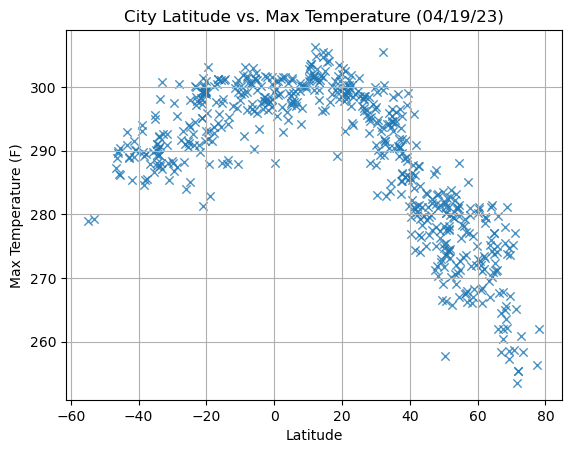

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="x", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

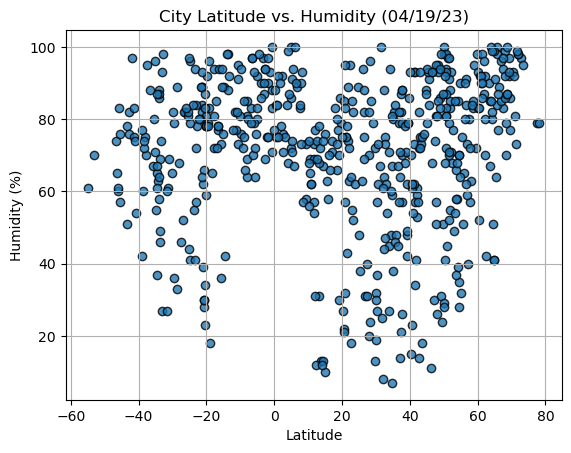

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\sergi\AppData\Local\Temp\ipykernel_13144\1913998274.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(lats,


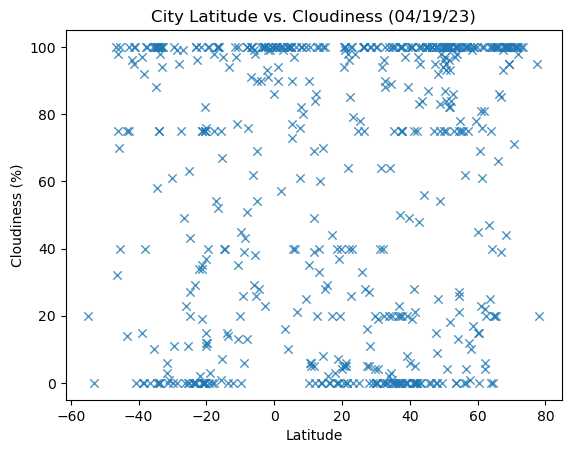

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="x", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(False)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

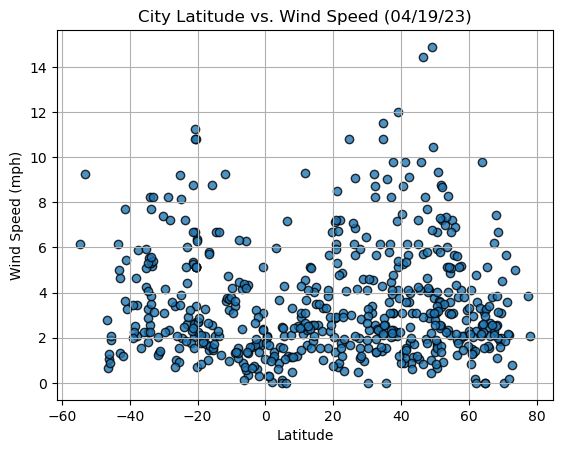

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,springfield,37.2153,-93.2982,296.61,64,100,8.23,US,1681952255
6,shingu,33.7333,135.9833,294.27,71,100,2.30,JP,1681952255
7,albany,42.6001,-73.9662,276.83,72,100,4.00,US,1681952255
8,ribeira grande,38.5167,-28.7000,285.80,68,97,2.24,PT,1681952255
10,qaanaaq,77.4840,-69.3632,256.32,79,95,3.83,GL,1681952255


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,279.21,70,0,9.26,CL,1681952255
1,santa cruz,-17.8000,-63.1667,292.85,94,75,2.06,BO,1681952036
2,bambous virieux,-20.3428,57.7575,299.29,83,75,5.14,MU,1681952255
3,san rafael,-34.6177,-68.3301,291.03,37,58,3.28,AR,1681952255
5,cape town,-33.9258,18.4232,289.33,86,75,8.23,ZA,1681952090


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.888297343524216


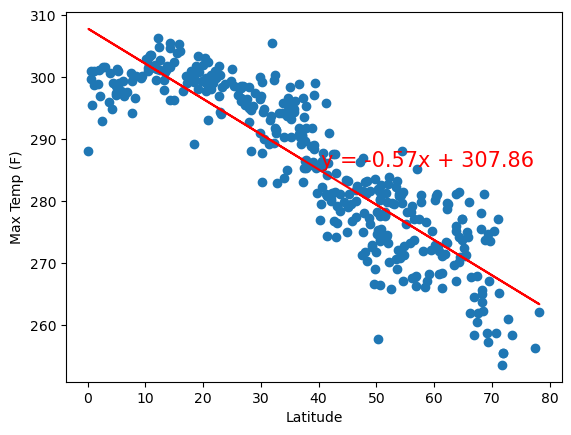

None


In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.6747025751816811


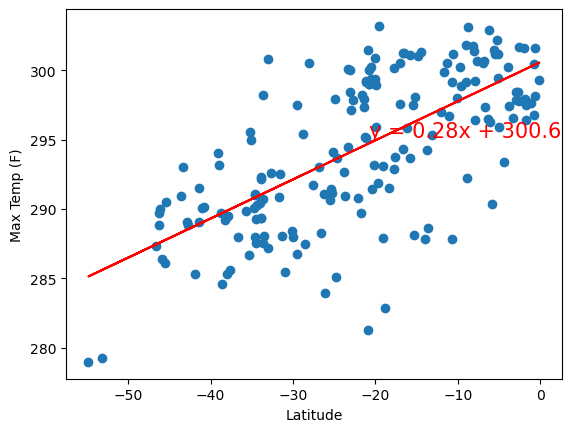

None


In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship: Maximum temperature versus latitude plot indicates that places closer to the equator experience extreme temperatures, the peak of the plot. As you move towards the poles, the maximum temperature drops gradually.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.19724340120790138


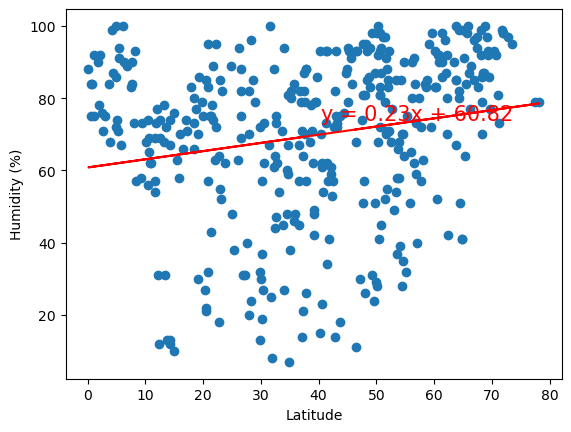

None


In [33]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.29801942551087507


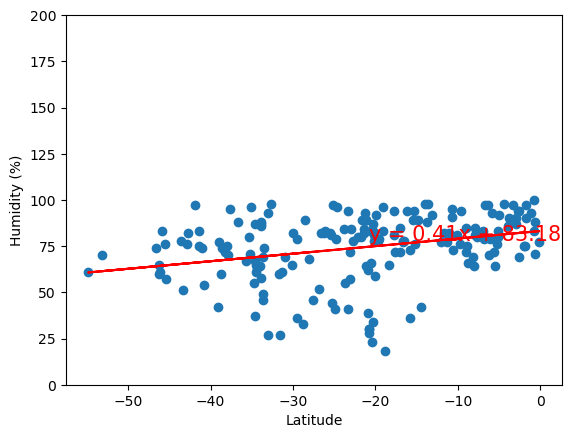

None


In [34]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship: Humidity of a place doesn’t seem to be correlated with the latitude, from both the hemisphere. Data points are scattered throughout the plot, except for an outlier in southern hemisphere that is far away from the regression line. The r-square values are too low suggesting poor correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


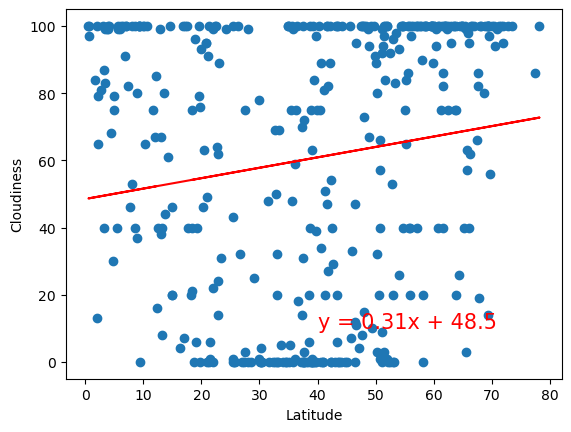

In [19]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.10075183902101466


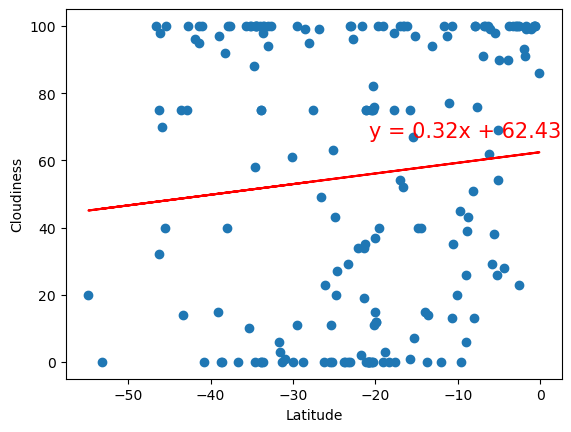

None


In [35]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship: There is a weak positive correlation between latitude and cloudiness for southern hemisphere and there is a weak positive correlation between latitude and cloudiness for northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0752870462064577


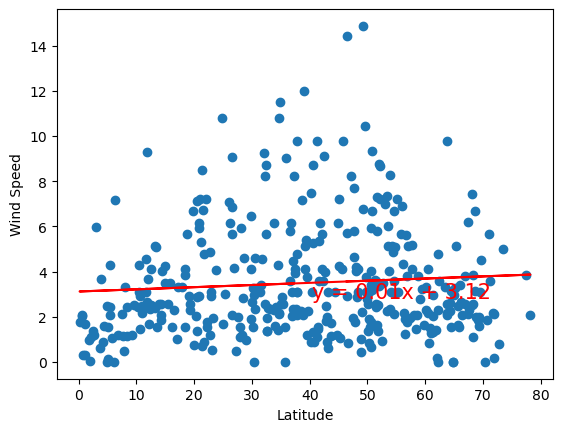

None


In [36]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.20411501144639374


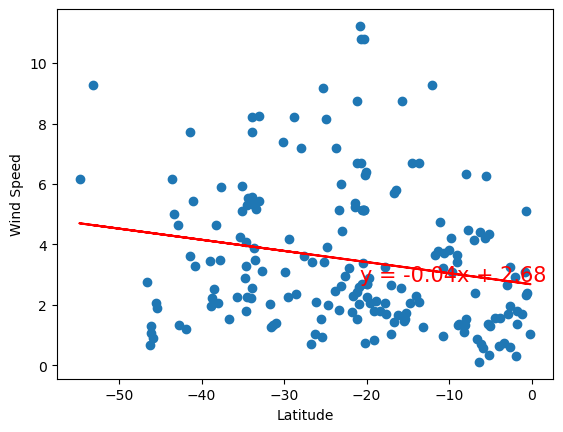

None


In [37]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship: There is a weak negative correlation between latitude and wind speed for southern hemisphere and there is a weak positive correlation between latitude and windspeed for northern hemisphere.